<a href="https://colab.research.google.com/github/jinghaoliu/MachineLearning/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 无监督

*   1.1 Kmenas
*   列表项


## 2 有监督

*   2.1 KNN
*   2.2 SVM


## Kmeans

In [ ]:
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

kk=3

X, y = make_blobs(n_samples=300,n_features=2,centers=kk,random_state=1)

print("X:\n", X)
print("y:\n", y)


X:
 [[-1.10195984e+01 -3.15882031e+00]
 [-6.38088086e+00 -8.50663809e+00]
 [-1.12174569e+01 -1.50397990e+00]
 [-1.61589091e+00  4.18017563e+00]
 [-1.46126019e+00  4.52549851e+00]
 [-1.13009458e+00  4.54419108e+00]
 [-1.01336898e+01 -4.75061833e+00]
 [-7.58703957e-01  3.72276201e+00]
 [-2.30647659e+00  5.30797676e+00]
 [-7.48773915e+00 -8.06676370e+00]
 [-7.32386504e+00 -7.96393491e+00]
 [-5.67856792e+00 -7.60509852e+00]
 [-8.43890696e+00 -3.84394585e+00]
 [-1.09947323e+01 -4.06014253e+00]
 [-8.17259469e+00 -8.17094642e+00]
 [-1.41076074e+00  4.10984872e+00]
 [-1.13296642e+01 -5.71403711e+00]
 [-1.25041532e+01 -6.06751247e+00]
 [-1.34052081e+00  4.15711949e+00]
 [-1.01077040e+01 -3.94479960e+00]
 [-8.18717759e+00 -5.25907547e+00]
 [-1.01659113e+01 -4.12752889e+00]
 [-5.27930518e-01  5.92630669e+00]
 [-1.37889483e+00  4.33337717e+00]
 [-2.80207810e+00  4.05714715e+00]
 [-1.16719083e+01 -3.12831872e+00]
 [-1.00330804e+01 -1.84274349e+00]
 [-1.92744799e+00  4.93684534e+00]
 [-1.02518924e+0

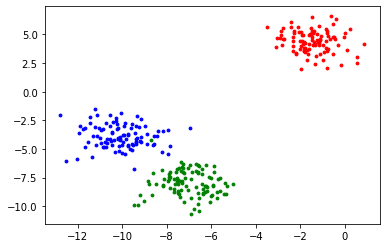

In [ ]:
color = ['red', 'blue','green','yellow','pink','orange','gray']
fig, axi1=plt.subplots(1)
for i in range(kk):
    axi1.scatter(X[y==i,0], X[y==i,1],marker='o',s=8,c=color[i])
plt.show()

In [ ]:
## Kmeans center
import random
import numpy as np

def random_center(k,X):
  centers = []

  for i in range(k):
    x = np.random.randint(np.min(X[:,0]),np.max(X[:,0]))
    y = np.random.randint(np.min(X[:,1]),np.max(X[:,1]))
    centers.append(np.array([x,y]))

  
  return centers

centers=random_center(kk,X)
centers

[array([-4,  2]), array([-10,   4]), array([-5, -6])]

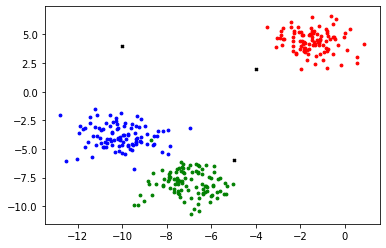

In [ ]:
color = ['red', 'blue','green','yellow','pink','orange','gray']
fig, axi1=plt.subplots(1)
for i in range(kk):
    axi1.scatter(X[y==i,0], X[y==i,1],marker='o',s=8,c=color[i])
    axi1.scatter(centers[i][0],centers[i][1],marker='X',s=8,c='black')

plt.show()

In [ ]:
def distance(x,y):
  dis=(x-y)**2
  dis=np.sqrt(dis)
  dis=np.sum(dis)
  return dis
distance(1,2)

1.0

In [ ]:
#center=plus_center
while(True):

  category=[]

  for d in range(len(X)):
    dist=[]

    for c in range(len(centers)):
      dis=distance(X[d],centers[c])
      dist.append(dis)
      
    category.append(np.argmin(dist))

  varDict = locals()
  category=np.array(category)
  for c_idx_i in range(kk):
   
    idx=np.argwhere(category==c_idx_i).flatten() 

    varDict['cat_idx_'+str(c_idx_i)] = idx

  if (np.mean(X[cat_idx_0],axis=0)==centers[0]).all():
    break
  for n_c in range(len(centers)):
    M=np.mean(X[eval("cat_idx_"+str(n_c))],axis=0)
    if  (~np.isnan(M).all()):
      centers[n_c]=np.mean(X[eval("cat_idx_"+str(n_c))],axis=0)

In [ ]:
centers

[array([-1.4531567 ,  4.40756967]),
 array([-10.68214855,  -2.70404042]),
 array([-8.21928562, -6.46190685])]

In [ ]:
# Kmeans++ center

import random
def distance(x,y):
  dis=(x-y)**2
  dis=np.sqrt(dis)
  dis=np.sum(dis)
  return dis
plus_center=[]
plus_center.append(random.sample(list(X), 1))
print(plus_center)


for plus_i in range(kk):
  
  plus_d=[]
  plus_idx=0
  for i in range(len(X)):
    plus_d.append(distance(np.mean(plus_center),X[i]))
 
  plus_d_sum=np.sum(plus_d)
  p=(np.array(plus_d)**2)/plus_d_sum
  plus_p_idx=np.argmax(p)
  plus_center.append(X[plus_p_idx])
plus_center = np.delete(plus_center, 0, axis=0)
print(plus_center)

[[array([-6.22402063, -8.25611532])]]
[array([-0.38580398,  6.37359162]) array([-9.47838518, -9.93079448])
 array([-0.38580398,  6.37359162])]


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [ ]:
centers

[array([-10.09049849,  -3.88304117]),
 array([-7.03767436, -7.98856993]),
 array([-1.4531567 ,  4.40756967])]

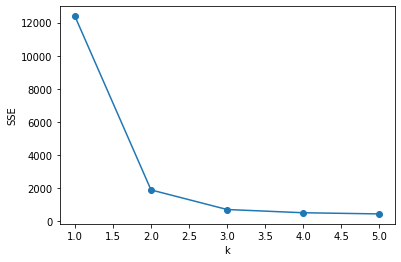

In [ ]:
#SSE
def SSE(x,y):
    return np.sum((x - y) ** 2)

train_category=[]
kkk=5

Sse=[]
for k in range(1,kkk+1):
  s=[]
  centers=random_center(k,X)

  while(True):

    category=[]

    for d in range(len(X)):
      dist=[]

      for c in range(len(centers)):
        dis=distance(X[d],centers[c])
        dist.append(dis)
      
      category.append(np.argmin(dist))

    varDict = locals()
    category=np.array(category)
    for c_idx_i in range(k):
   
      idx=np.argwhere(category==c_idx_i).flatten() 

      varDict['cat_idx_'+str(c_idx_i)] = idx

    if(np.mean(X[cat_idx_0],axis=0)==centers[0]).all():
      break
    for n_c in range(len(centers)):
      M=np.mean(X[eval("cat_idx_"+str(n_c))],axis=0)
      if(~np.isnan(M).all()):
        centers[n_c]=np.mean(X[eval("cat_idx_"+str(n_c))],axis=0)
  # for t in range(kk):
    # SSE(centers[n_c],eval("cat_idx_"+str(n_c)))
  
  for n_c in range(len(centers)):
    sse=SSE(X[eval("cat_idx_"+str(n_c))],centers[n_c])
    s.append(sse)
  Sse.append(np.sum(s))



plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(range(1,kkk+1),Sse,'o-')
plt.show()



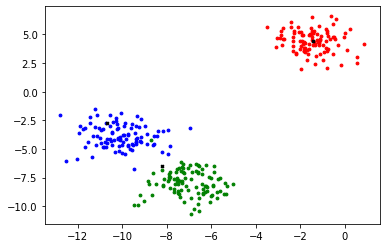

In [ ]:
color = ['red', 'blue','green','yellow','pink','orange','gray']
fig, axi1=plt.subplots(1)
for i in range(kk):
    axi1.scatter(X[y==i,0], X[y==i,1],marker='o',s=8,c=color[i])
    axi1.scatter(centers[i][0],centers[i][1],marker='X',s=8,c='black')

plt.show()

## KNN

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

kk=3

X, y = make_blobs(n_samples=300,n_features=2,centers=kk,random_state=1)

print("X:\n", X[:10])
print("y:\n", y[:10])

X:
 [[-11.01959845  -3.15882031]
 [ -6.38088086  -8.50663809]
 [-11.2174569   -1.5039799 ]
 [ -1.61589091   4.18017563]
 [ -1.46126019   4.52549851]
 [ -1.13009458   4.54419108]
 [-10.13368983  -4.75061833]
 [ -0.75870396   3.72276201]
 [ -2.30647659   5.30797676]
 [ -7.48773915  -8.0667637 ]]
y:
 [1 2 1 0 0 0 1 0 0 2]


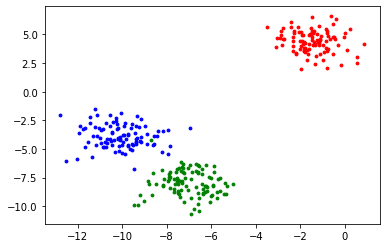

In [ ]:
color = ['red', 'blue','green','yellow','pink','orange','gray']
fig, axi1=plt.subplots(1)
for i in range(kk):
    axi1.scatter(X[y==i,0], X[y==i,1],marker='o',s=8,c=color[i])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(x_train[:10])
print(y_train[:10])

print(x_test[:10])
print(y_test[:10])
xtest=x_test
ytest=y_test

[[ -6.09834293  -7.44017905]
 [ -7.44971443  -6.69511987]
 [ -1.00051011   2.77905153]
 [ -6.37151596  -8.91129543]
 [ -7.87372938  -7.59578865]
 [ -2.76017908   5.55121358]
 [ -1.69825542   2.79071751]
 [ -0.32810279   4.11918201]
 [ -7.84274101  -7.037387  ]
 [-10.47308538  -3.47573837]]
[2 2 0 2 2 0 0 0 2 1]
[[ -7.93489041  -7.78403764]
 [ -7.94653906  -3.36768655]
 [ -1.53940095   5.02369298]
 [ -0.5381422    4.81539041]
 [ -1.53773863   5.53597378]
 [ -9.14443128  -4.36637786]
 [ -5.85642586  -7.0375263 ]
 [-10.72330962  -4.82111722]
 [ -9.20734891  -8.98339697]
 [ -5.86705134  -6.44863393]]
[2 1 0 0 0 1 2 1 2 2]


In [ ]:
def distance(x,y):
  dis=(x-y)**2
  dis=np.sqrt(dis)
  dis=np.sum(dis)
  return dis

In [ ]:
import numpy as np

K=2
d=[]
ids=[]
for i_test in x_test:
  for i_train in x_train:
    d.append(distance(i_train,i_test))
  ids.append(np.argsort(d))
  d=[]

idx2element=[]
predict=[]
for ii in range(len(ids)):
  for row in ids[ii]:
    idx2element.append(y_train[row])
  
  counts = np.bincount(idx2element[:K])  
  predict.append(np.argmax(counts))
  idx2element=[]
predict=np.array(predict)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        19

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



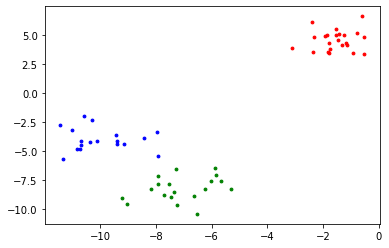

In [ ]:
color = ['red', 'blue','green','yellow','pink','orange','gray']
fig, axi1=plt.subplots(1)
for i in range(kk):
    axi1.scatter(xtest[y_test==i,0], xtest[y_test==i,1],marker='o',s=8,c=color[i])
plt.show()

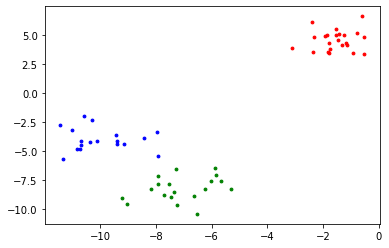

In [ ]:
color = ['red', 'blue','green','yellow','pink','orange','gray']
fig, axi1=plt.subplots(1)
for i in range(kk):
    axi1.scatter(xtest[predict==i,0], xtest[predict==i,1],marker='o',s=8,c=color[i])
plt.show()

In [ ]:
import numpy as np

K=10   #2-10
d=[]
ids=[]
K_predict=[]
for i_test in x_test:
  for i_train in x_train:
    d.append(distance(i_train,i_test))
  ids.append(np.argsort(d))
  d=[]

for k in range(1,K):
  idx2element=[]
  predict=[]
  for ii in range(len(ids)):
    for row in ids[ii]:
      idx2element.append(y_train[row])
  
    counts = np.bincount(idx2element[:k])  
    predict.append(np.argmax(counts))
    idx2element=[]
  K_predict.append(np.array(predict))
print(K_predict)

[array([2, 1, 0, 0, 0, 1, 2, 1, 2, 2, 0, 1, 2, 0, 2, 0, 2, 0, 1, 1, 0, 2,
       2, 1, 0, 0, 2, 2, 1, 0, 1, 0, 2, 1, 1, 0, 2, 0, 1, 1, 2, 0, 0, 0,
       0, 1, 1, 0, 1, 2, 1, 2, 1, 0, 2, 0, 2, 0, 2, 0]), array([2, 1, 0, 0, 0, 1, 2, 1, 2, 2, 0, 1, 2, 0, 2, 0, 2, 0, 1, 1, 0, 2,
       2, 1, 0, 0, 2, 2, 1, 0, 1, 0, 2, 1, 1, 0, 2, 0, 1, 1, 2, 0, 0, 0,
       0, 1, 1, 0, 1, 2, 1, 2, 1, 0, 2, 0, 2, 0, 2, 0]), array([2, 1, 0, 0, 0, 1, 2, 1, 2, 2, 0, 1, 2, 0, 2, 0, 2, 0, 1, 1, 0, 2,
       2, 1, 0, 0, 2, 2, 1, 0, 1, 0, 2, 1, 1, 0, 2, 0, 1, 1, 2, 0, 0, 0,
       0, 1, 1, 0, 1, 2, 1, 2, 1, 0, 2, 0, 2, 0, 2, 0]), array([2, 1, 0, 0, 0, 1, 2, 1, 2, 2, 0, 1, 2, 0, 2, 0, 2, 0, 1, 1, 0, 2,
       2, 1, 0, 0, 2, 2, 1, 0, 1, 0, 2, 1, 1, 0, 2, 0, 1, 1, 2, 0, 0, 0,
       0, 1, 1, 0, 1, 2, 1, 2, 1, 0, 2, 0, 2, 0, 2, 0]), array([2, 1, 0, 0, 0, 1, 2, 1, 2, 2, 0, 1, 2, 0, 2, 0, 2, 0, 1, 1, 0, 2,
       2, 1, 0, 0, 2, 2, 1, 0, 1, 0, 2, 1, 1, 0, 2, 0, 1, 1, 2, 0, 0, 0,
       0, 1, 1, 0, 1, 2, 1, 2, 1, 0, 2, 0

In [ ]:
acc=[]
for i in range(K-1):
  correct_prediction = np.equal(y_test, K_predict[i])
  acc.append(np.mean(correct_prediction))
acc

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9833333333333333]

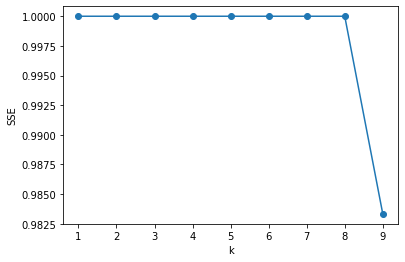

In [ ]:
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(range(1,K),acc,'o-')
plt.show()


## SVM

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt



X, y = make_blobs(n_samples=300,n_features=2,centers=2,random_state=1)

print("X:\n", X[:10])
print("y:\n", y[:10])

X:
 [[-11.01959845  -3.15882031]
 [ -9.31371118  -4.30675853]
 [ -2.8793043    6.85585852]
 [ -1.61589091   4.18017563]
 [ -1.46126019   4.52549851]
 [ -1.13009458   4.54419108]
 [-10.13368983  -4.75061833]
 [ -0.75870396   3.72276201]
 [ -2.30647659   5.30797676]
 [-10.42056947  -3.86688414]]
y:
 [1 1 0 0 0 0 1 0 0 1]


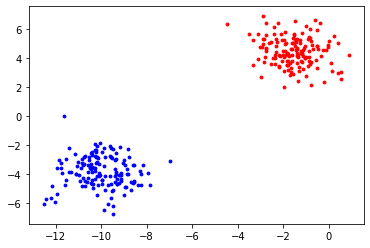

In [3]:
color = ['red', 'blue','green','yellow','pink','orange','gray']
fig, axi1=plt.subplots(1)
for i in range(2):
    axi1.scatter(X[y==i,0], X[y==i,1],marker='o',s=8,c=color[i])
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(x_train[:10])
print(y_train[:10])

print(x_test[:10])
print(y_test[:10])
xtest=x_test
ytest=y_test

[[ -9.03117325  -3.2402995 ]
 [-10.38254475  -2.49524031]
 [ -1.00051011   2.77905153]
 [ -9.30434628  -4.71141588]
 [-10.8065597   -3.39590909]
 [ -2.76017908   5.55121358]
 [ -1.69825542   2.79071751]
 [ -0.32810279   4.11918201]
 [-10.77557133  -2.83750744]
 [-10.47308538  -3.47573837]]
[1 1 0 1 1 0 0 0 1 1]
[[-10.86772073  -3.58415808]
 [  0.39161354   4.99215187]
 [ -1.53940095   5.02369298]
 [ -0.5381422    4.81539041]
 [ -1.53773863   5.53597378]
 [ -9.14443128  -4.36637786]
 [ -8.78925618  -2.83764674]
 [-10.72330962  -4.82111722]
 [-12.14017923  -4.78351741]
 [ -8.79988166  -2.24875438]]
[1 0 0 0 0 1 1 1 1 1]
